# Classification: titanic dataset

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action="ignore")

In [368]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## EDA
train 데이터만 활용

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [246]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [369]:
numeric_cols = df.select_dtypes(include=['int','float']).columns
categ_cols = df.select_dtypes(include=['object', 'bool','category']).columns

### Imputation Missing Value

In [283]:
#결측치 개수 확인
df.isnull().sum().sort_values(ascending=False) / len(df) *100

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

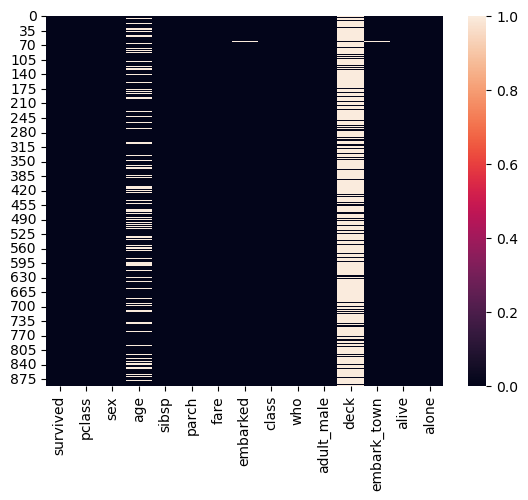

In [284]:
#결측치 시각적 확인
sns.heatmap(df.isnull())

'deck' 변수의 경우 결측치 비율이 77%나 된다. 무작정 제거하기 보다 각 변수의 개수를 파악하고, survived 변수 별로 어떤 차이를 보이는지 확인해본다 

<Axes: xlabel='deck', ylabel='Count'>

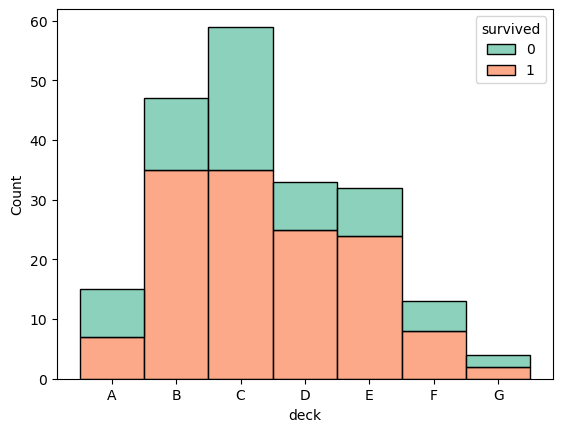

In [285]:
sns.histplot(data=df, x='deck', hue='survived',multiple="stack",palette="Set2")

선실 번호를 나타내는 변수인데, "B","C" 를 보았을 때 생존자는 비슷하지만 "C"의 사망이 더 많은 것을 볼 수 있다. 따라서 단순 제거는 하지 않고 다른 값으로 채우는 방식으로 수행하려한다.\
최빈값으로 채우는 방식도 고려할 수 있으나, 각 위치별로 생존 여부와의 연관성이 있기 때문에 아에 새로운 "Unknown" 값으로 채워주고자 한다. 

<Axes: xlabel='survived', ylabel='Count'>

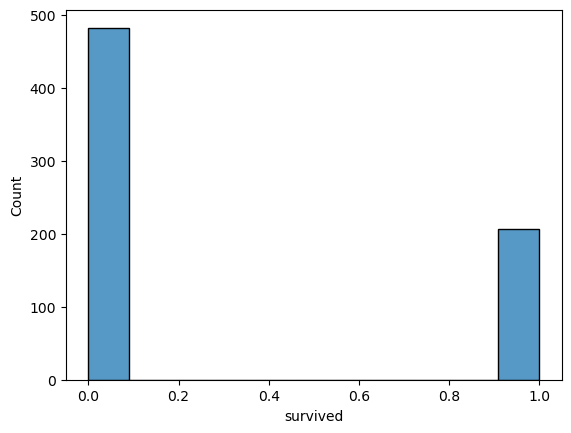

In [286]:
sns.histplot(data=df[df.deck.isnull()], x='survived')

결측값도 생존 여부 차이가 많이 난다. 

In [370]:
df =df.astype({"deck":"object"})
df["deck"] = df["deck"].fillna('Unkown')

<Axes: xlabel='age', ylabel='Count'>

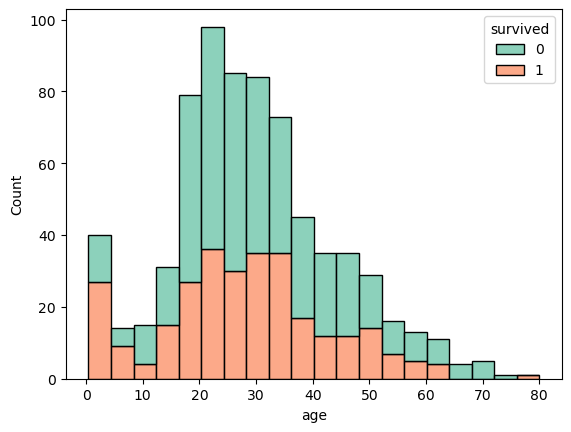

In [288]:
#age 결측치 채우기 위한 분포 재확인 
sns.histplot(data=df, x='age', hue='survived',multiple="stack",palette="Set2")

연령에 따른 생존 여부 차이가 큰 편이며, 나이가 많아질 수록 생존 확률이 희박해짐 

<Axes: >

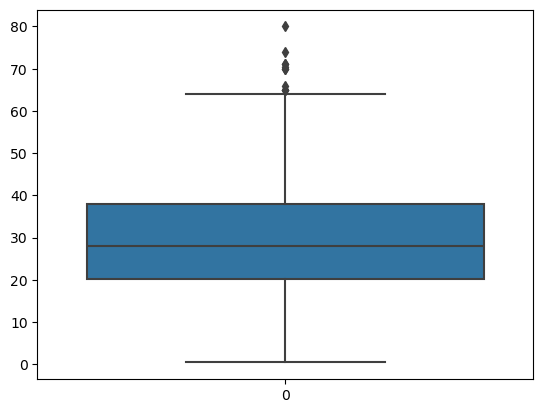

In [289]:
sns.boxplot(data=df['age'])

박스 플랏을 그려보았을 때, 아웃라이어가 존재하는 편이므로 평균값이 아닌 메디안으로 결측치 채움

In [371]:
df['age'] = df['age'].fillna(df.age.median())

In [291]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

<Axes: xlabel='embarked', ylabel='count'>

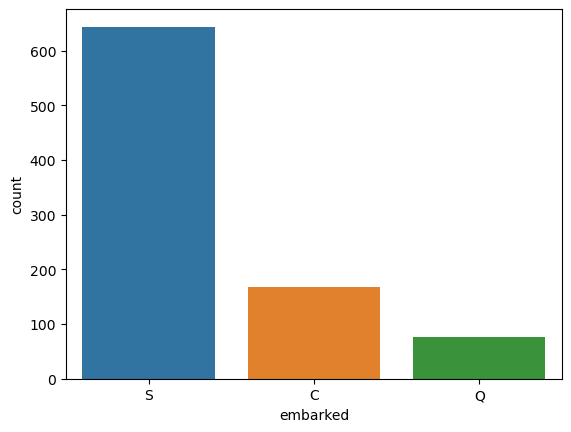

In [294]:
sns.countplot(data =df, x='embarked')

<Axes: xlabel='embark_town', ylabel='count'>

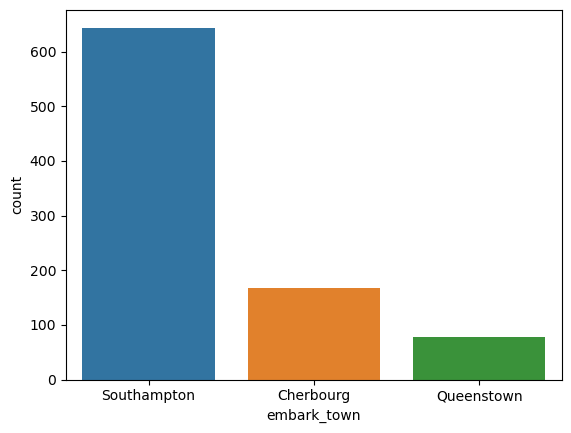

In [295]:
sns.countplot(data =df, x='embark_town')

둘다 최빈값으로 채워도 될 것 같음

In [372]:
#최빈값으로 채우기 
df['embarked']=df['embarked'].fillna(df.embarked.mode()[0])
df['embark_town']=df['embark_town'].fillna(df.embark_town.mode()[0])

In [373]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

모든 결측치 처리되었음

In [374]:
#분석 과제에서는 train / test 나누어 데이터 제공하므로 나누고 시작했어야 했지만, test에 보통 결측치 없으니까 일단 결측치 채우고 나눠주었다
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=42)

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

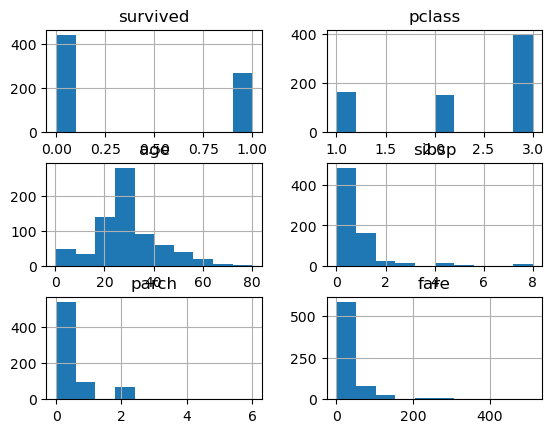

In [308]:
#numerical variable distribution
train.hist()

사실상 fare와 age만 수치형 변수라고 할 수 있다. 두 변수에 대해서만 따로 분포를 다시 확인해본다. 

<Axes: xlabel='age', ylabel='Count'>

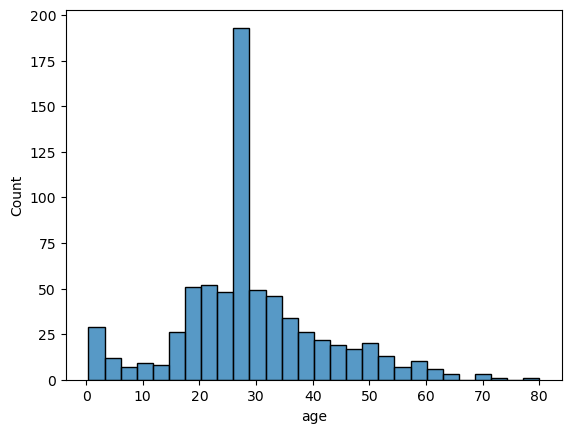

In [309]:
sns.histplot(train.age)

skewedness는 확인할 수 없다. 추후 스케일링만 해주기로 한다 

<Axes: xlabel='fare', ylabel='Count'>

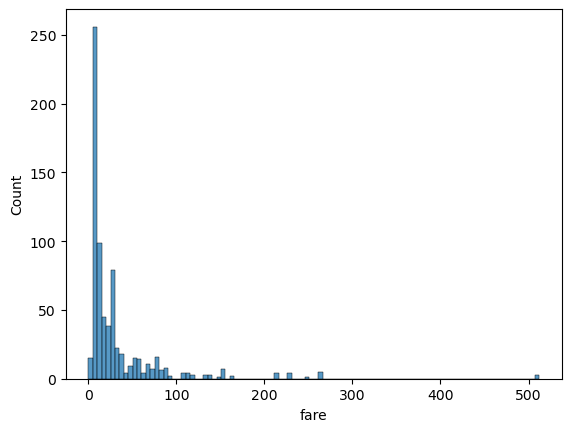

In [310]:
sns.histplot(train.fare)

positive skewed함으로 로그 변환 해주기로 한다.

In [312]:
train[train.fare==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,Unkown,Southampton,no,True
633,0,1,male,28.0,0,0,0.0,S,First,man,True,Unkown,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,Unkown,Southampton,no,True
277,0,2,male,28.0,0,0,0.0,S,Second,man,True,Unkown,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,Unkown,Southampton,yes,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,Unkown,Southampton,no,True
815,0,1,male,28.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
732,0,2,male,28.0,0,0,0.0,S,Second,man,True,Unkown,Southampton,no,True
806,0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True


fare가 0인 거 존재: +1해줘서 무한값 방지할 것

In [375]:
train['fare']=np.log(train.fare+1)

<Axes: xlabel='fare', ylabel='Count'>

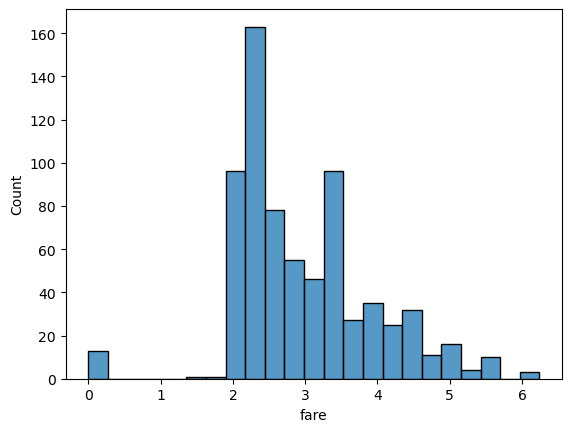

In [314]:
sns.histplot(train.fare)

변환 잘되었음 확인할 수 있다.

### 인코딩 for 범주형 변수

In [315]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [376]:
#class는 숫자를 가지므로 숫자로 맵핑해주기 
train['class']=train['class'].replace({'First':1, 'Second':2, 'Third':3})
#나머지 0,1로 맵핑 가능한 변수 처리 
train['sex'] = train['sex'].replace({'male':0, 'female':1})
train['who'] = train['who'].replace({'man':0, 'woman':1, 'child':3})
train['alone']=train['alone'].replace({True: 1, False:0})
train['adult_male']=train['adult_male'].replace({True: 1, False:0})
train['alive']=train['alive'].replace({"no":0, 'yes':1})

In [377]:
label_cols=['embarked', 'deck', 'embark_town']
l_encoder= LabelEncoder()

In [378]:
for i in label_cols:
    train[i]=l_encoder.fit_transform(train[i])

### 스케일링 for 연속형 변수

In [382]:
#스케일링은 train/ test에 각각 다른 함수가 적용된다
#X, y 분리
X_train= train.drop(["survived"], axis=1) 
y_train= train[["survived"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train[['age','fare']]= scaler.fit_transform(X_train[['age','fare']])

음수값이 나온다. MinMaxScaler로 대체하자.

In [384]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train[['age','fare']]= minmax_scaler.fit_transform(X_train[['age','fare']])

In [388]:
#final processing code for test set
def processing(df): #df : X_test
    df['fare']=np.log(df.fare+1)
    #class는 숫자를 가지므로 숫자로 맵핑해주기 
    df['class']=df['class'].replace({'First':1, 'Second':2, 'Third':3})
    #나머지 0,1로 맵핑 가능한 변수 처리 
    df['sex'] = df['sex'].replace({'male':0, 'female':1})
    df['who'] = df['who'].replace({'man':0, 'woman':1, 'child':3})
    df['alone']=df['alone'].replace({True: 1, False:0})
    df['adult_male']=df['adult_male'].replace({True: 1, False:0})
    df['alive']=df['alive'].replace({"no":0, 'yes':1})
    
    #인코딩
    label_cols=['embarked', 'deck', 'embark_town']
    for i in label_cols:
        df[i]=l_encoder.fit_transform(df[i])
    #스케일링은 따로
    df[['age','fare']]= minmax_scaler.transform(df[['age','fare']])
    return df

In [386]:
X_test= test.drop(["survived"], axis=1) 
y_test= test[["survived"]]

In [389]:
X_test=processing(X_test)

In [394]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,3,0,0.346569,1,1,0.446703,0,3,0,1,7,0,1,0
439,2,0,0.384267,0,0,0.391344,2,2,0,1,7,2,0,1
840,3,0,0.246042,0,0,0.350727,2,3,0,1,7,2,0,1
720,2,1,0.070118,0,1,0.565039,2,2,3,0,7,2,1,0
39,3,1,0.170646,1,0,0.401359,0,3,3,0,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3,0,0.208344,0,0,0.335679,2,3,0,1,7,2,0,1
773,3,0,0.346569,0,0,0.337639,0,3,0,1,7,0,0,1
25,3,1,0.472229,1,5,0.557253,2,3,1,0,7,2,1,0
84,2,1,0.208344,0,0,0.391344,2,2,1,0,7,2,1,1


### 모델링

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acc

In [391]:
#각 모델 정의 
lo = LogisticRegression()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc =SVC()

estimators =[("lo",lo), ("rf", rf), ('ada', ada),('gb',gb), ('dt',dt), ('svc',svc)]

In [393]:
np.random.seed(0)

## 베이스라인
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

print(acc(y_test, y_rf))

1.0


In [395]:
voting = VotingClassifier(estimators, voting = 'hard')
voting.fit(X_train, y_train)
y_voting = voting.predict(X_test)
print('accuracy:', acc(y_test, y_voting))

accuracy: 1.0


In [397]:
y_voting

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [396]:
y_test


,survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


이렇게 정확하게 맞출 수 있다고...? 일단 다른 데이터셋으로 넘어가자 